In [1]:
import pandas as pd 
import nltk 
from nltk.corpus import stopwords 
from nltk.stem import WordNetLemmatizer 
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.model_selection import train_test_split 
from sklearn.naive_bayes import MultinomialNB, BernoulliNB 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, auc 
import string 

In [2]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
df = pd.read_csv('ecommerceDataset.csv')
df.head(10)


,Household,"Paper Plane Design Framed Wall Hanging Motivational Office Decor Art Prints (8.7 X 8.7 inch) - Set of 4 Painting made up in synthetic frame with uv textured print which gives multi effects and attracts towards it. This is an special series of paintings which makes your wall very beautiful and gives a royal touch. This painting is ready to hang, you would be proud to possess this unique painting that is a niche apart. We use only the most modern and efficient printing technology on our prints, with only the and inks and precision epson, roland and hp printers. This innovative hd printing technique results in durable and spectacular looking prints of the highest that last a lifetime. We print solely with top-notch 100% inks, to achieve brilliant and true colours. Due to their high level of uv resistance, our prints retain their beautiful colours for many years. Add colour and style to your living space with this digitally printed painting. Some are for pleasure and some for eternal bliss.so bring home this elegant print that is lushed with rich colors that makes it nothing but sheer elegance to be to your friends and family.it would be treasured forever by whoever your lucky recipient is. Liven up your place with these intriguing paintings that are high definition hd graphic digital prints for home, office or any room."
0,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
1,Household,SAF 'UV Textured Modern Art Print Framed' Pain...
2,Household,"SAF Flower Print Framed Painting (Synthetic, 1..."
3,Household,Incredible Gifts India Wooden Happy Birthday U...
4,Household,Pitaara Box Romantic Venice Canvas Painting 6m...
5,Household,Paper Plane Design Starry Night Vangoh Wall Ar...
6,Household,Pitaara Box Romantic Venice Canvas Painting 6m...
7,Household,SAF 'Ganesh Modern Art Print' Painting (Synthe...
8,Household,Paintings Villa UV Textured Modern Art Print F...
9,Household,Painting Mantra Art Street - Jardin Bird Frame...


In [4]:
df.columns =['class name', 'description']

In [5]:
df.head(10)

,class name,description
0,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
1,Household,SAF 'UV Textured Modern Art Print Framed' Pain...
2,Household,"SAF Flower Print Framed Painting (Synthetic, 1..."
3,Household,Incredible Gifts India Wooden Happy Birthday U...
4,Household,Pitaara Box Romantic Venice Canvas Painting 6m...
5,Household,Paper Plane Design Starry Night Vangoh Wall Ar...
6,Household,Pitaara Box Romantic Venice Canvas Painting 6m...
7,Household,SAF 'Ganesh Modern Art Print' Painting (Synthe...
8,Household,Paintings Villa UV Textured Modern Art Print F...
9,Household,Painting Mantra Art Street - Jardin Bird Frame...


In [6]:
stopword = set(stopwords.words('english')) 
stopword

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [7]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [8]:
df = df.dropna()
print(df.isnull().sum())

class name     0
description    0
dtype: int64


In [9]:
def preprocess_text(text):
    # Remove punctuation
    remove_punc = [char for char in text if char not in string.punctuation]
    clean_words = ''.join(remove_punc) # char joining
    
    # Remove stopwords
    text = ([word for word in clean_words.split() if word.lower() not in stopword])
    return text

In [10]:
df.description = df.description.apply(preprocess_text)
df.description

0        [SAF, Floral, Framed, Painting, Wood, 30, inch...
1        [SAF, UV, Textured, Modern, Art, Print, Framed...
2        [SAF, Flower, Print, Framed, Painting, Synthet...
3        [Incredible, Gifts, India, Wooden, Happy, Birt...
4        [Pitaara, Box, Romantic, Venice, Canvas, Paint...
                               ...                        
50419    [Strontium, MicroSD, Class, 10, 8GB, Memory, C...
50420    [CrossBeats, Wave, Waterproof, Bluetooth, Wire...
50421    [Karbonn, Titanium, Wind, W4, White, Karbonn, ...
50422    [Samsung, Guru, FM, Plus, SMB110ED, Black, Col...
50423                 [Micromax, Canvas, Win, W121, White]
Name: description, Length: 50423, dtype: object

In [11]:
df.description[2]

['SAF',
 'Flower',
 'Print',
 'Framed',
 'Painting',
 'Synthetic',
 '135',
 'inch',
 'x',
 '22',
 'inch',
 'UV',
 'Textured',
 'Set',
 '3',
 'SANFSW4951',
 'ColorMulticolor',
 'Size35',
 'cm',
 'x',
 '50',
 'cm',
 'x',
 '2',
 'cm',
 'beautiful',
 'painting',
 'involves',
 'action',
 'skill',
 'using',
 'paint',
 'right',
 'manner',
 'hence',
 'end',
 'product',
 'picture',
 'speak',
 'thousand',
 'words',
 'say',
 'Arts',
 'trend',
 'quite',
 'time',
 'give',
 'different',
 'viewer',
 'different',
 'meanings',
 'style',
 'design',
 'saf',
 'wood',
 'matte',
 'painting',
 'frame',
 'quite',
 'abstract',
 'mysteriously',
 'beautiful',
 'painting',
 'nice',
 'frame',
 'gift',
 'family',
 'friend',
 'painting',
 'various',
 'forms',
 'certain',
 'figures',
 'seen',
 'image',
 'add',
 'good',
 'set',
 'lights',
 'place',
 'painting',
 'decor',
 'give',
 'different',
 'feel',
 'look',
 'place',
 'Quality',
 'durability',
 'painting',
 'matte',
 'finish',
 'includes',
 'good',
 'quality',
 'f

In [12]:
lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    lemmatized_text = ' '.join([lemmatizer.lemmatize(word) for word in text])
    return lemmatized_text

df.description = df.description.apply(lemmatize_text)

In [13]:
vectorizer = TfidfVectorizer()

x = vectorizer.fit_transform(df.description)
y = df['class name']

In [14]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [15]:
multinomial = MultinomialNB()
multinomial.fit(xtrain,ytrain)

MultinomialNB()

In [16]:
models = [
    MultinomialNB(),
    BernoulliNB()
]

for model in models:
    model.fit(xtrain, ytrain)

    ypred = model.predict(xtest)
    ypred_proba = model.predict_proba(xtest)[:, 1]

    print(f"Model: {type(model).__name__}")
    print('Accuracy Score =',model.score(xtest, ytest))
    print("Confusion Matrix:")
    print(confusion_matrix(ytest, ypred))

    print('\n')

Model: MultinomialNB
Accuracy Score = 0.9399107585523054
Confusion Matrix:
[[2149   17   26  143]
 [   4 1641    6  108]
 [  41    5 1873  193]
 [  20   13   30 3816]]


Model: BernoulliNB
Accuracy Score = 0.8777392166584036
Confusion Matrix:
[[1641  515   22  157]
 [   5 1716    9   29]
 [  39   91 1761  221]
 [  21   74   50 3734]]




In [19]:
from sklearn.metrics import classification_report

In [20]:
y_predMNB = multinomial.predict(xtest)
resultMNB = classification_report(ytest,y_predMNB,output_dict=True)
accMNB = resultMNB['accuracy']
print('Classification Report: on test case \n\n',classification_report(ytest,y_predMNB))

Classification Report: on test case 

                         precision    recall  f1-score   support

                 Books       0.97      0.92      0.94      2335
Clothing & Accessories       0.98      0.93      0.96      1759
           Electronics       0.97      0.89      0.93      2112
             Household       0.90      0.98      0.94      3879

              accuracy                           0.94     10085
             macro avg       0.95      0.93      0.94     10085
          weighted avg       0.94      0.94      0.94     10085



In [21]:
y_predMNB = multinomial.predict(xtrain)

print('Classification Report: on train case \n\n',classification_report(ytrain,y_predMNB))

Classification Report: on train case 

                         precision    recall  f1-score   support

                 Books       0.98      0.93      0.95      9485
Clothing & Accessories       0.99      0.95      0.97      6911
           Electronics       0.97      0.92      0.94      8509
             Household       0.91      0.98      0.95     15433

              accuracy                           0.95     40338
             macro avg       0.96      0.94      0.95     40338
          weighted avg       0.95      0.95      0.95     40338



In [22]:
Bernoulli = BernoulliNB() 
Bernoulli.fit(xtrain,ytrain)

BernoulliNB()

In [23]:
y_predBNB = Bernoulli.predict(xtest)
resultBNB= classification_report(ytest,y_predBNB,output_dict=True)
accBNB = resultBNB['accuracy'] 
print('Classification Report: test case\n\n',classification_report(ytest,y_predBNB))

Classification Report: test case

                         precision    recall  f1-score   support

                 Books       0.96      0.70      0.81      2335
Clothing & Accessories       0.72      0.98      0.83      1759
           Electronics       0.96      0.83      0.89      2112
             Household       0.90      0.96      0.93      3879

              accuracy                           0.88     10085
             macro avg       0.88      0.87      0.87     10085
          weighted avg       0.89      0.88      0.88     10085



In [24]:
y_predBNB = Bernoulli.predict(xtrain)
print('Classification Report: train case\n\n',classification_report(ytrain,y_predBNB))

Classification Report: train case

                         precision    recall  f1-score   support

                 Books       0.97      0.72      0.82      9485
Clothing & Accessories       0.72      0.99      0.83      6911
           Electronics       0.96      0.86      0.91      8509
             Household       0.92      0.96      0.94     15433

              accuracy                           0.89     40338
             macro avg       0.89      0.88      0.88     40338
          weighted avg       0.90      0.89      0.89     40338



In [25]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
x_smote,y_smote = smote.fit_resample(x,y)

In [26]:
xtrainSmote,xtestSmote,ytrainSmote,ytestSmote = train_test_split(x_smote,y_smote,test_size = 0.2, random_state = 42)

In [27]:
multinomial = MultinomialNB() 
multinomial.fit(xtrainSmote,ytrainSmote)

MultinomialNB()

In [28]:
y_predMNBsmote = multinomial.predict(xtestSmote)
resultMNBsmote= classification_report(ytestSmote,y_predMNBsmote,output_dict=True)
accMNBsmote = resultMNBsmote['accuracy'] 
print('Classification Report: on test case \n\n',classification_report(ytestSmote,y_predMNBsmote))

Classification Report: on test case 

                         precision    recall  f1-score   support

                 Books       0.98      0.94      0.96      3976
Clothing & Accessories       0.98      0.99      0.98      3874
           Electronics       0.96      0.96      0.96      3786
             Household       0.93      0.96      0.95      3814

              accuracy                           0.96     15450
             macro avg       0.96      0.96      0.96     15450
          weighted avg       0.96      0.96      0.96     15450



In [29]:
Bernoulli = BernoulliNB()
Bernoulli.fit(xtrainSmote,ytrainSmote)

BernoulliNB()

In [30]:
y_predBNBsmote = Bernoulli.predict(xtestSmote)
resultBNBsmote= classification_report(ytestSmote,y_predBNBsmote,output_dict=True)
accBNBsmote = resultBNBsmote['accuracy'] 
print('Classification Report: on test case \n\n',classification_report(ytestSmote,y_predBNBsmote))

Classification Report: on test case 

                         precision    recall  f1-score   support

                 Books       0.98      0.72      0.83      3976
Clothing & Accessories       0.79      0.99      0.88      3874
           Electronics       0.97      0.86      0.91      3786
             Household       0.84      0.96      0.90      3814

              accuracy                           0.88     15450
             macro avg       0.90      0.88      0.88     15450
          weighted avg       0.90      0.88      0.88     15450



In [32]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
y_encoded = LE.fit_transform(y_smote)
xtrainXG,xtestXG,ytrainXG,ytestXG = train_test_split(x_smote,y_encoded,test_size = 0.2, random_state = 42)
xgBoost = XGBClassifier(subsample = 0.8, reg_alpha = 0.1, n_estimators = 300, min_child_weight = 1, learning_rate = 0.1, colsample_bytree = 0.7, random_state = 42)

xgBoost.fit(xtrainXG, ytrainXG)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [33]:
y_predXG = xgBoost.predict(xtestXG)
resultXG= classification_report(ytestXG,y_predXG,output_dict=True)
accXG = resultXG['accuracy'] 
print('Classification report:\n\n', classification_report(ytestXG,y_predXG))

Classification report:

               precision    recall  f1-score   support

           0       0.96      0.97      0.97      3976
           1       0.99      0.98      0.98      3874
           2       0.98      0.96      0.97      3786
           3       0.95      0.96      0.96      3814

    accuracy                           0.97     15450
   macro avg       0.97      0.97      0.97     15450
weighted avg       0.97      0.97      0.97     15450



In [38]:
Model_Names = ['Multinomial', 'Bernoulli', 'Multinomial Smote', 'Bernoulli Smote', 'XGBoost']
accuracy_scores = [accMNB, accBNB, accMNBsmote, accBNBsmote, accXG]

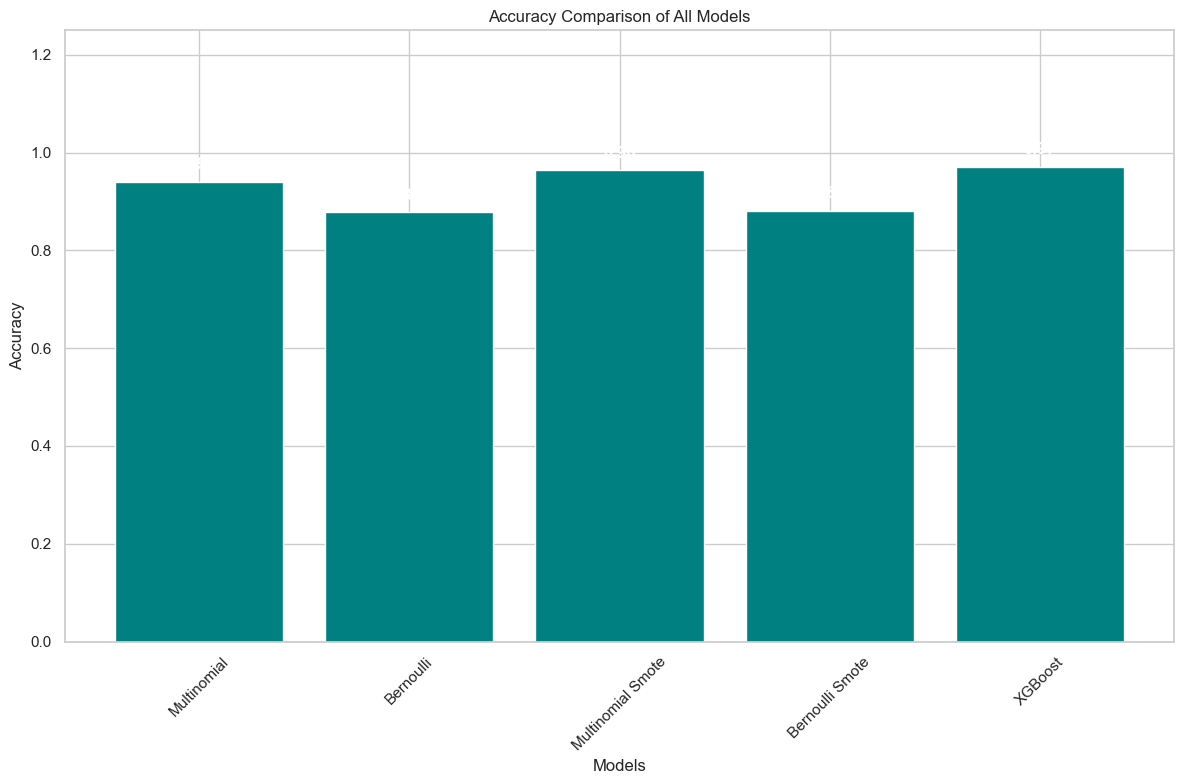

In [40]:
sns.set(style="whitegrid")

# Customize plot size and color
plt.figure(figsize=(12, 8))  # Larger figure size
plt.bar(Model_Names, accuracy_scores, color='teal')  # Change bar color

plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of All Models')

plt.ylim(0, 1.25)  # Set y-axis limit

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Add labels to the bars with modified text appearance
for i, score in enumerate(accuracy_scores):
    plt.text(i, score + 0.02, f'{score:.2f}', ha='center', va='bottom', fontweight='bold', color='white')

plt.tight_layout()
plt.show()